In [3]:
import matplotlib.pyplot as plt
import pandas as pd

wide_df = pd.read_csv('book_code/ch_03/data/wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv('book_code/ch_03/data/long_data.csv', usecols=['date', 'datatype','value'])[['date', 'datatype','value']]

In [5]:
wide_df.head(6)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1


In [7]:
wide_df.describe(include='all', datetime_is_numeric=True)

,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
mean,2018-10-16 00:00:00,16.829032,7.561290,10.022581
min,2018-10-01 00:00:00,7.800000,-1.100000,-1.100000
25%,2018-10-08 12:00:00,12.750000,2.500000,5.550000
50%,2018-10-16 00:00:00,16.100000,6.700000,8.300000
75%,2018-10-23 12:00:00,21.950000,13.600000,16.100000
max,2018-10-31 00:00:00,26.700000,17.800000,21.700000
std,NaN,5.714962,6.513252,6.596550


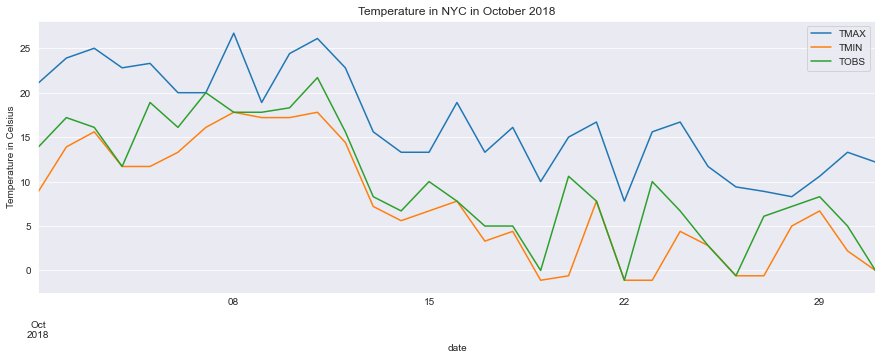

In [8]:
wide_df.plot(kind='line', y=['TMAX', 'TMIN', 'TOBS'], x='date', title='Temperature in NYC in October 2018', figsize=(15,5)).set_ylabel('Temperature in Celsius')
plt.show()

In [9]:
long_df.head(6)

,date,datatype,value
0,2018-10-01T00:00:00,TMAX,21.1
1,2018-10-01T00:00:00,TMIN,8.9
2,2018-10-01T00:00:00,TOBS,13.9
3,2018-10-02T00:00:00,TMAX,23.9
4,2018-10-02T00:00:00,TMIN,13.9
5,2018-10-02T00:00:00,TOBS,17.2


In [10]:
long_df.describe(include='all')

,date,datatype,value
count,93,93,93.000000
unique,31,3,NaN
top,2018-10-01T00:00:00,TMAX,NaN
freq,3,31,NaN
mean,NaN,NaN,11.470968
std,NaN,NaN,7.362354
min,NaN,NaN,-1.100000
25%,NaN,NaN,6.700000
50%,NaN,NaN,11.700000
75%,NaN,NaN,17.200000


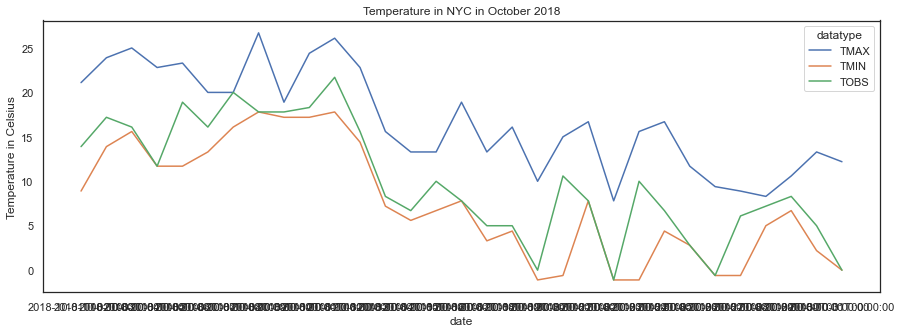

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)}, style='white')
ax=sns.lineplot(data=long_df, hue='datatype', y='value', x='date')
ax.set_ylabel('Temperature in Celsius')
ax.set_title('Temperature in NYC in October 2018')
plt.show()

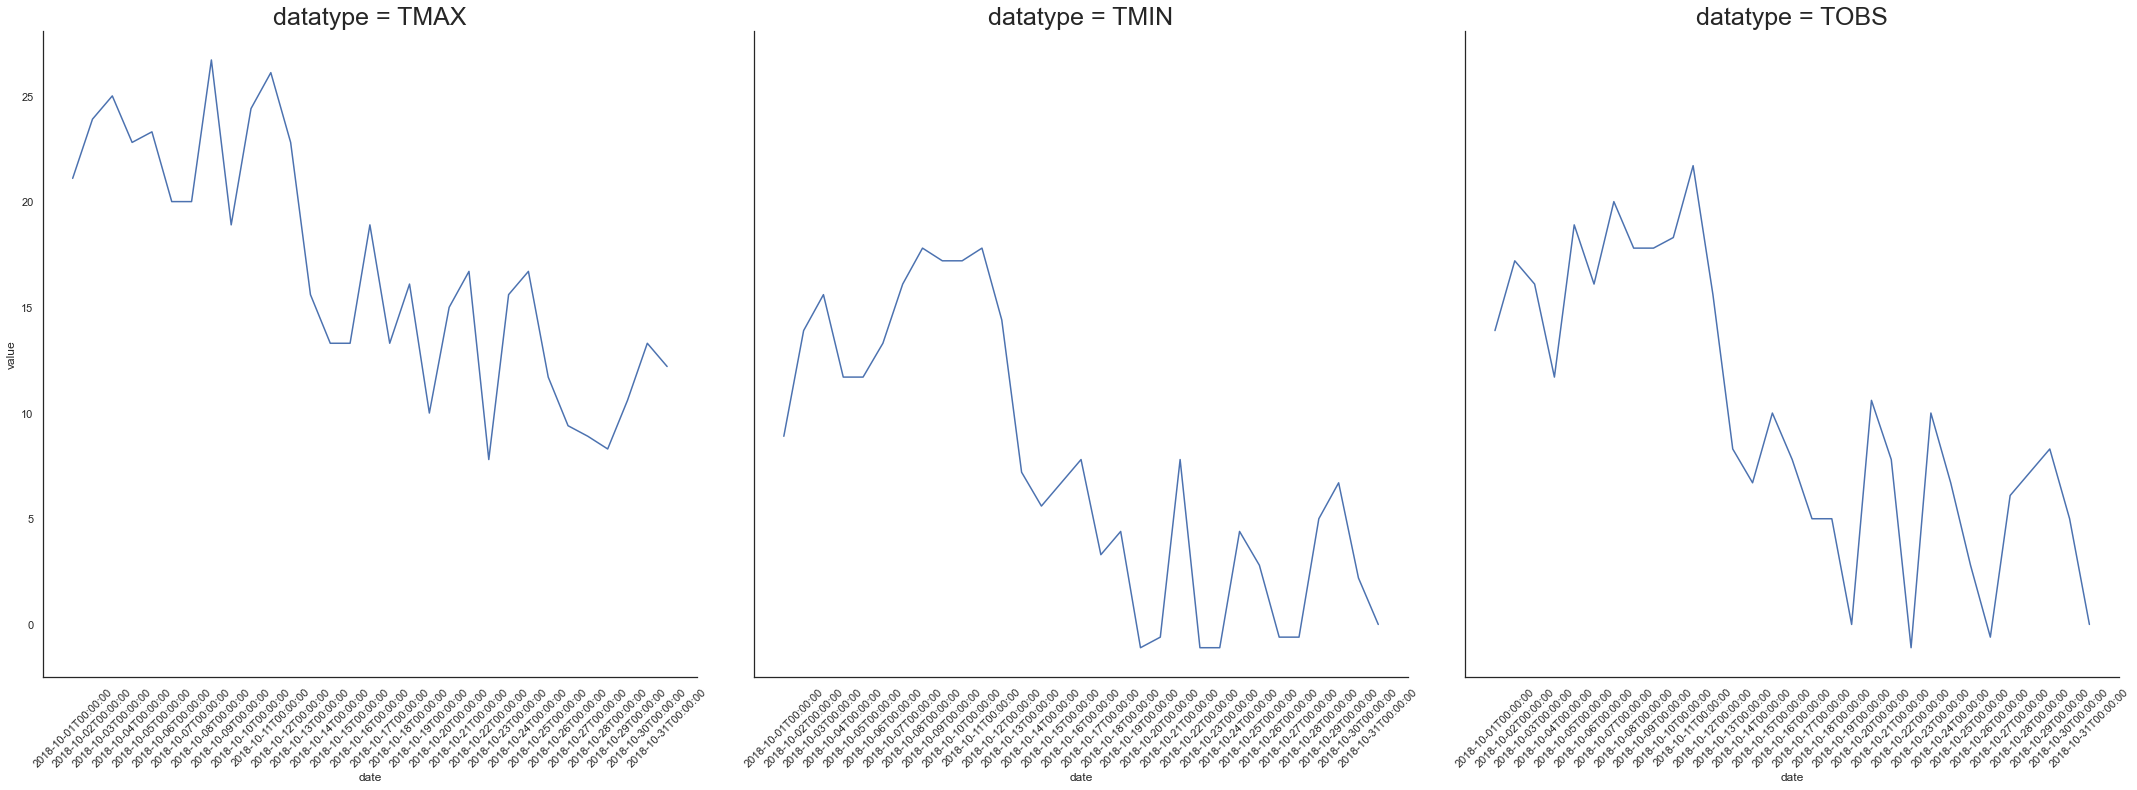

In [13]:
sns.set(rc={'figure.figsize':(20,10)},style='white')
g = sns.FacetGrid(long_df, col='datatype', height=10)
g = g.map(plt.plot, 'date', 'value')
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()

In [15]:
import requests

def make_request(endpoint, payload=None):
    """
    Make a request to a specific endpoint on the weather API passing headers and optional payload.
    :param endpoint: The endpoint of the API you want to make a GET request to.
    :param payload: A dictionary of data to pass along with the request.
    :return: Response object.
    """
    return requests.get(f'https://www.ncdc.noaa.gov/cdo-web/api/v2/{endpoint}',
                        headers= {'token': 'smbffdSjdmkspjaNrjgjMPszUcYBOstL'},
                        params=payload)

response = make_request('datasets')
response.status_code

200

In [16]:
response.json().keys()

dict_keys(['metadata', 'results'])

In [17]:
response.json()['metadata']

{'resultset': {'offset': 1, 'count': 11, 'limit': 25}}

In [18]:
response.json()['results'][0].keys()

dict_keys(['uid', 'mindate', 'maxdate', 'name', 'datacoverage', 'id'])

In [19]:
[(data['id'], data['name']) for data in response.json()['results']]

[('GHCND', 'Daily Summaries'),
 ('GSOM', 'Global Summary of the Month'),
 ('GSOY', 'Global Summary of the Year'),
 ('NEXRAD2', 'Weather Radar (Level II)'),
 ('NEXRAD3', 'Weather Radar (Level III)'),
 ('NORMAL_ANN', 'Normals Annual/Seasonal'),
 ('NORMAL_DLY', 'Normals Daily'),
 ('NORMAL_HLY', 'Normals Hourly'),
 ('NORMAL_MLY', 'Normals Monthly'),
 ('PRECIP_15', 'Precipitation 15 Minute'),
 ('PRECIP_HLY', 'Precipitation Hourly')]

In [20]:
response = make_request('datacategories', payload={'datasetid' : 'GHCND'})
response.status_code

200

In [21]:
response.json()

{'metadata': {'resultset': {'offset': 1, 'count': 9, 'limit': 25}},
 'results': [{'name': 'Evaporation', 'id': 'EVAP'},
  {'name': 'Land', 'id': 'LAND'},
  {'name': 'Precipitation', 'id': 'PRCP'},
  {'name': 'Sky cover & clouds', 'id': 'SKY'},
  {'name': 'Sunshine', 'id': 'SUN'},
  {'name': 'Air Temperature', 'id': 'TEMP'},
  {'name': 'Water', 'id': 'WATER'},
  {'name': 'Wind', 'id': 'WIND'},
  {'name': 'Weather Type', 'id': 'WXTYPE'}]}

In [23]:
response = make_request('datatypes', payload={'datacategoryid': 'TEMP', 'limit': 100})
response.status_code

200

In [24]:
[(data['id'], data['name']) for data in response.json()['results']]

[('CDSD', 'Cooling Degree Days Season to Date'),
 ('DATN',
  'Number of days included in the multiday minimum temperature (MDTN)'),
 ('DATX',
  'Number of days included in the multiday maximum temperature (MDTX)'),
 ('DLY-DUTR-NORMAL', 'Long-term averages of daily diurnal temperature range'),
 ('DLY-DUTR-STDDEV',
  'Long-term standard deviations of daily diurnal temperature range'),
 ('DLY-TAVG-NORMAL', 'Long-term averages of daily average temperature'),
 ('DLY-TAVG-STDDEV',
  'Long-term standard deviations of daily average temperature'),
 ('DLY-TMAX-NORMAL', 'Long-term averages of daily maximum temperature'),
 ('DLY-TMAX-STDDEV',
  'Long-term standard deviations of daily maximum temperature'),
 ('DLY-TMIN-NORMAL', 'Long-term averages of daily minimum temperature'),
 ('DLY-TMIN-STDDEV',
  'Long-term standard deviations of daily minimum temperature'),
 ('EMNT', 'Extreme minimum temperature for the period.'),
 ('EMXT', 'Extreme maximum temperature for the period.'),
 ('HDSD', 'Heating De

In [26]:
response = make_request('locationcategories', {'datasetid' : 'GHCND'})
response.status_code

200

In [27]:
import pprint
pprint.pprint(response.json())

{'metadata': {'resultset': {'count': 12, 'limit': 25, 'offset': 1}},
 'results': [{'id': 'CITY', 'name': 'City'},
             {'id': 'CLIM_DIV', 'name': 'Climate Division'},
             {'id': 'CLIM_REG', 'name': 'Climate Region'},
             {'id': 'CNTRY', 'name': 'Country'},
             {'id': 'CNTY', 'name': 'County'},
             {'id': 'HYD_ACC', 'name': 'Hydrologic Accounting Unit'},
             {'id': 'HYD_CAT', 'name': 'Hydrologic Cataloging Unit'},
             {'id': 'HYD_REG', 'name': 'Hydrologic Region'},
             {'id': 'HYD_SUB', 'name': 'Hydrologic Subregion'},
             {'id': 'ST', 'name': 'State'},
             {'id': 'US_TERR', 'name': 'US Territory'},
             {'id': 'ZIP', 'name': 'Zip Code'}]}


In [ ]:
def get_item(name, what, endpoint, start=1, end=None):
    """
    Grab the JSON payload for a given item using binary search.
    :param name: The item to look for.
    :param what: Dictionary specifying what the item in `name` is.
    :param endpoint: Where to look for the item.
    :param start: The position to start at. We don't need to touch this, the function will manipulate it with recursion.
    :param end: The last position of the cities. Used to find the midpoint, but like `start` this is not something we need to worry about.
    :return: Dictionary of the information for the item if found, otherwise an empty dictionary.
    """
    # Find the midpoint which we use to cut the data in half each time
    mid = (start + (end if end else 1)) // 2

    # Lowercase the name so this is not case-sensitive
    name = name.lower()

    # Define the payload we will send with each request. We will change the offset each time, and we only want one item.
    payload = {'datasetid' : 'GHCND',
               'sortfield' : 'name',
               'offset' : mid,
               'limit': 1}

    # Make request adding additional filter parameters from `what`
    response = make_request(endpoint, {**payload, **what})

    if response.ok:
        # If response is ok, grab the end index from the response metadata the first time through
        end = end if end else response.json()['metadata']['resultset']['count']

        # Grab the lowercase version of the current name
        current_name = response.json()['results'][0]['name'].lower()

        # If what we're searching for is in the current name, we found our item
        if name in current_name:
            # Return the found item
            return response.json()['results'][0]
        else:
            if start >= end:
                # If our start index is greater than or equal to our end index, we couldn't find it.
                return{0}
            elif name < current_name:
                # Our name comes before the current name in the alphabet, so we search further to the left
                return get_item(name, what, endpoint, start, mid-1)
            elif name > current_name:
                # Our name comes after the current name in the alphabet, so we search further to the right
                return get_item(name, what, endpoint, mid+1, end)
    else:
        # Response wasn't ok, use code to determine why.
        print(f'Response not OK, status: {response.status_code}')